In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/giovanni-lunetta/stat_4185/final':
  os.chdir(r'/Users/giovanni-lunetta/stat_4185/final')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_60254/1507729479.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap_external.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/codecs.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/aliases.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/__init__.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/utf_8.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/abc.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/io.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/stat.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/_collections_abc.py": 1648071154.0,

In [2]:
#| echo: true

import pandas as pd

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final/past_ten_seasons/data/cleaned.csv")

df.head(15)

,Player,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,Age,G,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,MP
0,Ivica Zubac,12.7,24.3,8.0,0.8,3.8,14.3,16.6,19-25,436,...,4.1,15.2,0.605,0.607,0.083,0.741,0.641,0.605,C,20.7
1,Ante Žižić,10.7,22.4,6.6,0.7,2.3,13.0,18.2,21-23,113,...,4.0,16.0,0.581,0.581,0.000,0.711,0.614,0.581,F-C,13.4
2,Paul Zipser,1.8,15.1,7.0,1.0,1.6,14.6,14.8,22-23,98,...,3.5,9.9,0.371,0.402,0.335,0.769,0.474,0.448,G-F,17.0
3,Tyler Zeller,9.6,18.5,8.1,0.7,2.7,11.8,17.8,23-30,414,...,4.5,14.3,0.508,0.512,0.286,0.764,0.553,0.511,F-C,17.5
4,Cody Zeller,9.8,19.9,9.9,1.4,2.5,12.6,17.0,21-30,509,...,4.2,13.8,0.522,0.537,0.218,0.730,0.577,0.527,C-F,22.0
5,Trae Young,2.2,9.7,44.1,1.4,0.4,15.9,32.6,20-24,353,...,1.8,27.1,0.437,0.491,0.351,0.876,0.580,0.505,G,33.8
6,Thaddeus Young,7.7,15.9,11.9,2.6,1.3,11.6,19.7,24-34,778,...,2.8,15.4,0.500,0.531,0.326,0.627,0.537,0.525,F,28.8
7,Nick Young,1.7,8.4,6.9,1.2,0.6,7.3,21.7,27-33,363,...,2.7,17.9,0.407,0.442,0.375,0.843,0.547,0.505,G-F,22.7
8,Tony Wroten,3.6,9.5,25.5,2.2,0.7,18.6,28.3,19-22,145,...,3.1,18.8,0.413,0.477,0.231,0.647,0.488,0.443,G,21.2
9,Dorell Wright,2.8,17.2,11.5,1.6,1.4,9.2,17.7,27-29,195,...,2.3,13.8,0.387,0.422,0.365,0.817,0.539,0.500,F-G,17.2


In [3]:
#| echo: true
#| eval: false

import matplotlib.pyplot as plt

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# create a boxplot for each continuous variable
for ax, col in zip(axes.flatten(), df.select_dtypes(include=['float64', 'int64']).columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

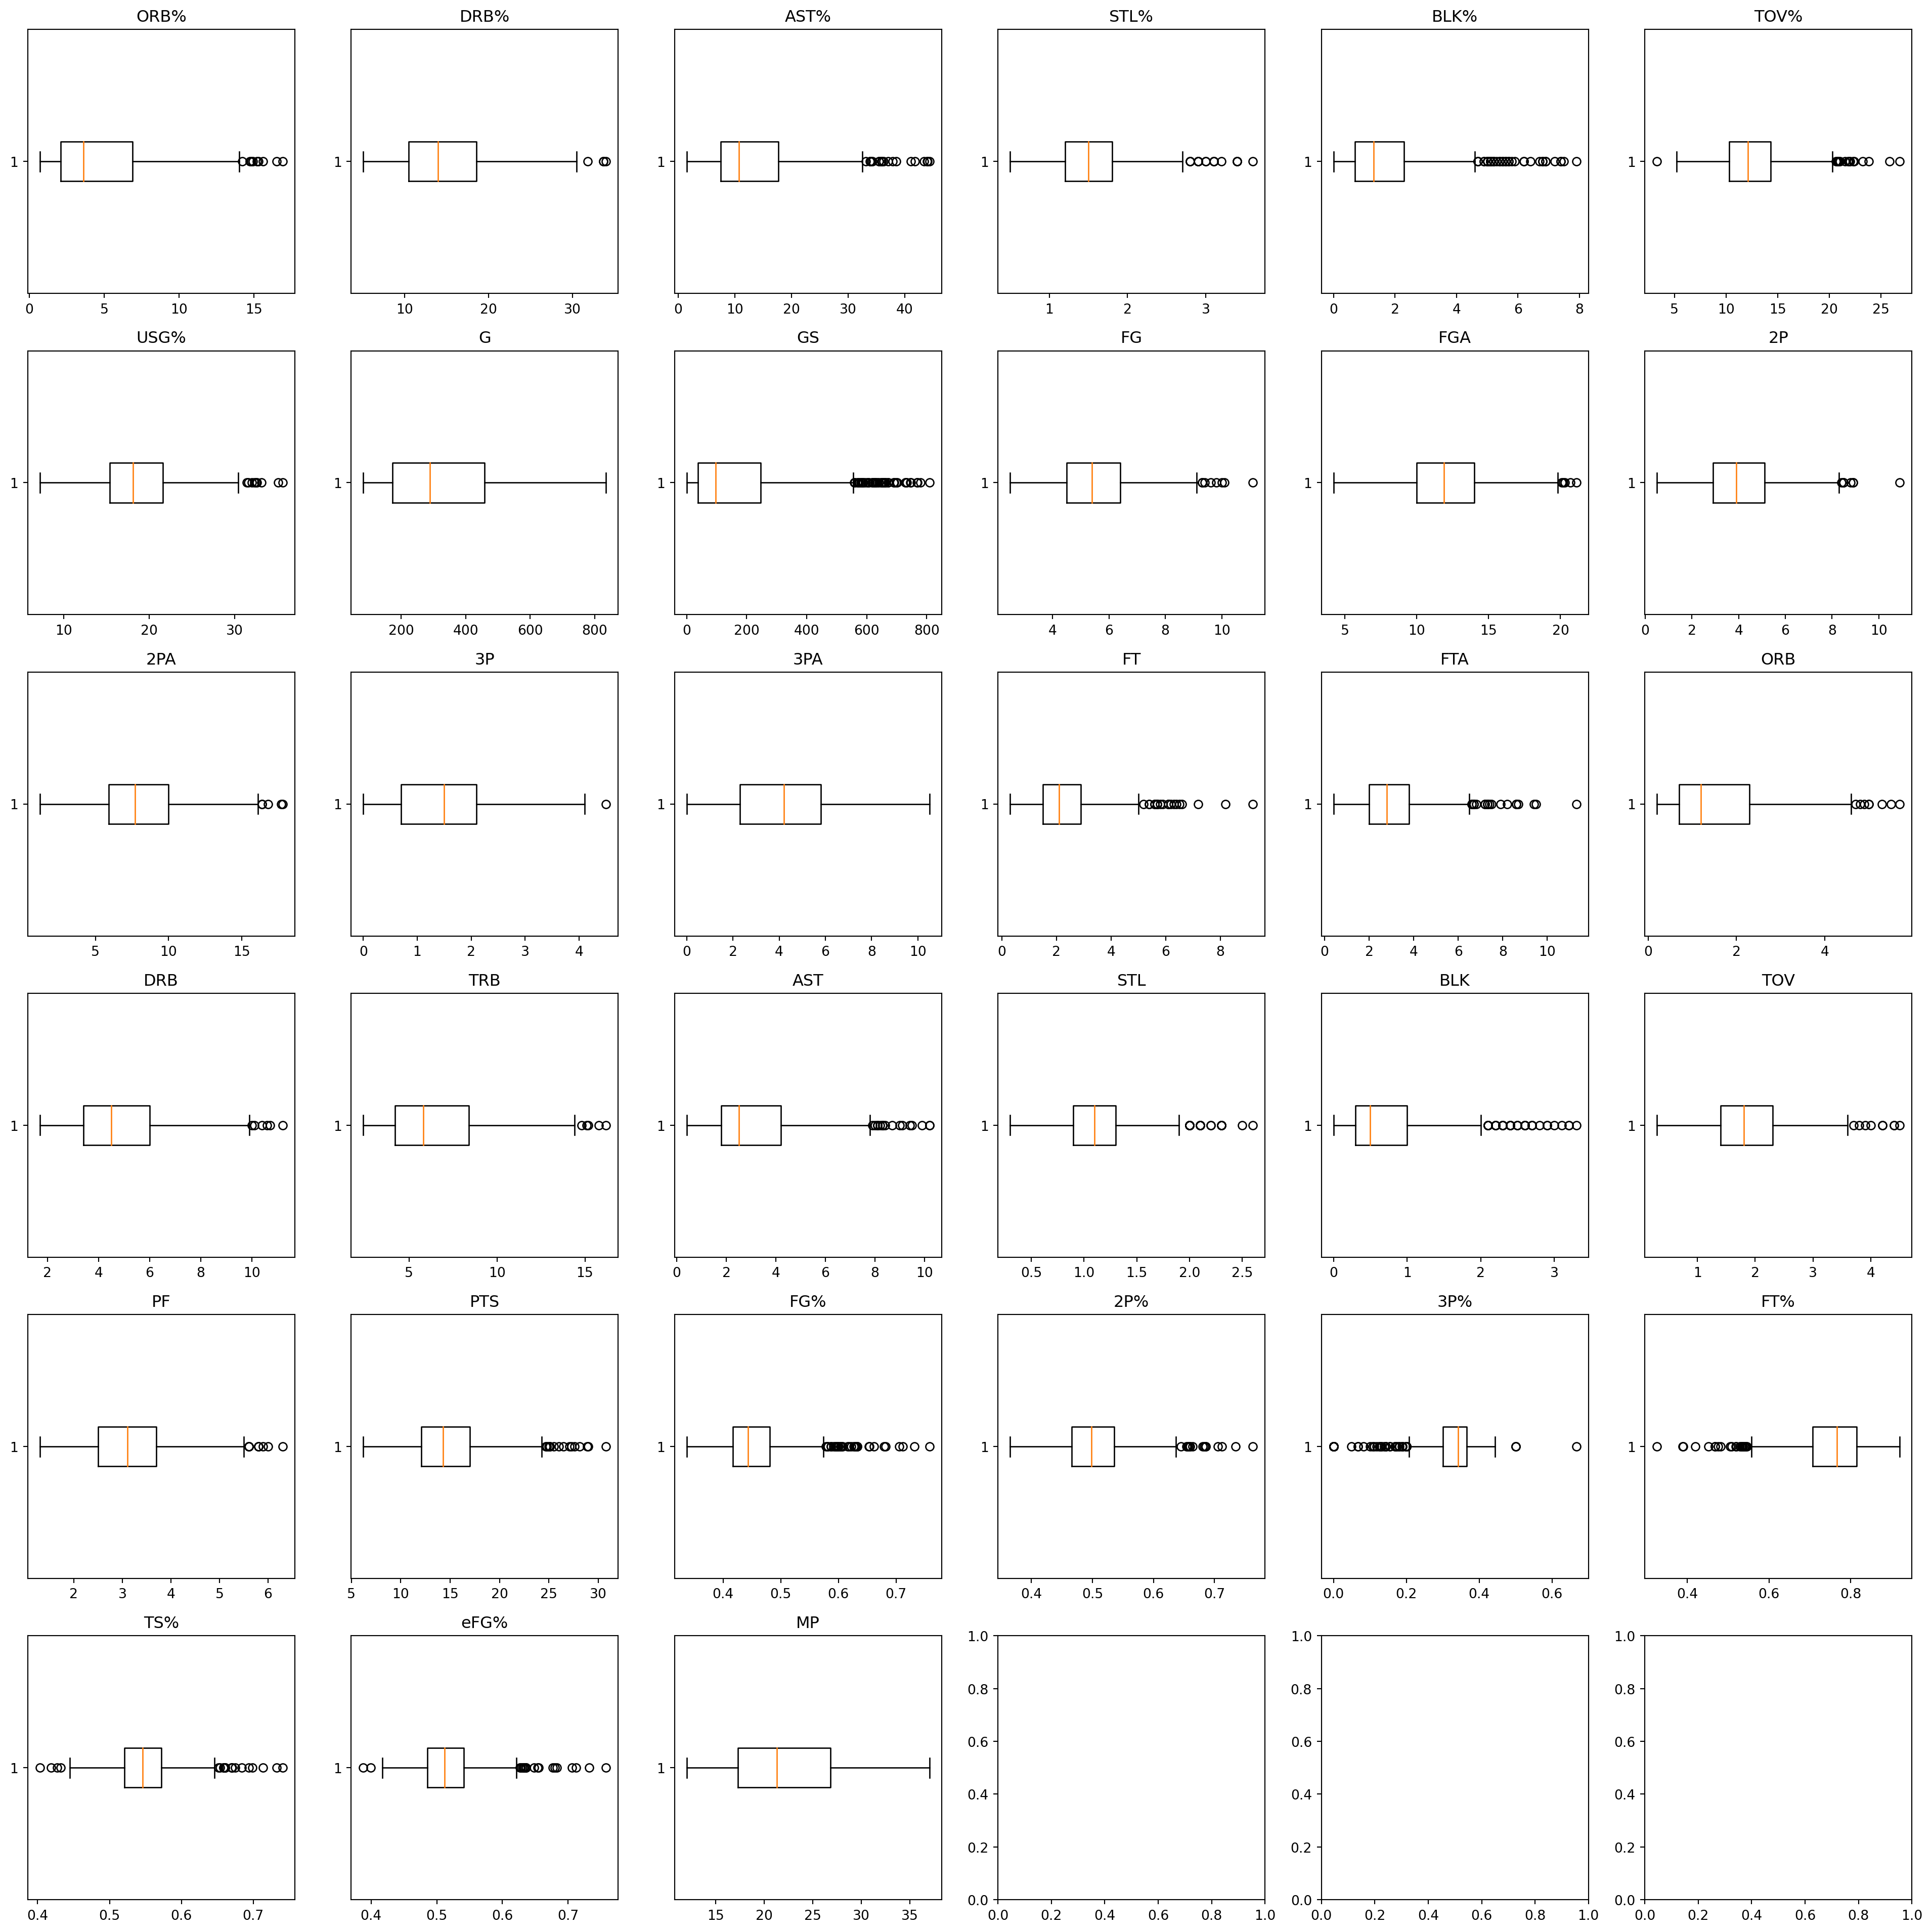

In [4]:
#| echo: false
#| eval: true

import matplotlib.pyplot as plt

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# create a boxplot for each continuous variable
for ax, col in zip(axes.flatten(), df.select_dtypes(include=['float64', 'int64']).columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

In [5]:
#| echo: true
#| eval: false

# select the columns to plot (all continuous variables and USG%)
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('USG%')
cols.append('USG%')

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# create a scatter plot for each continuous variable in relation to USG%
for ax, col in zip(axes.flatten(), cols):
    ax.scatter(df['USG%'], df[col])
    ax.set_xlabel('USG%')
    ax.set_ylabel(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

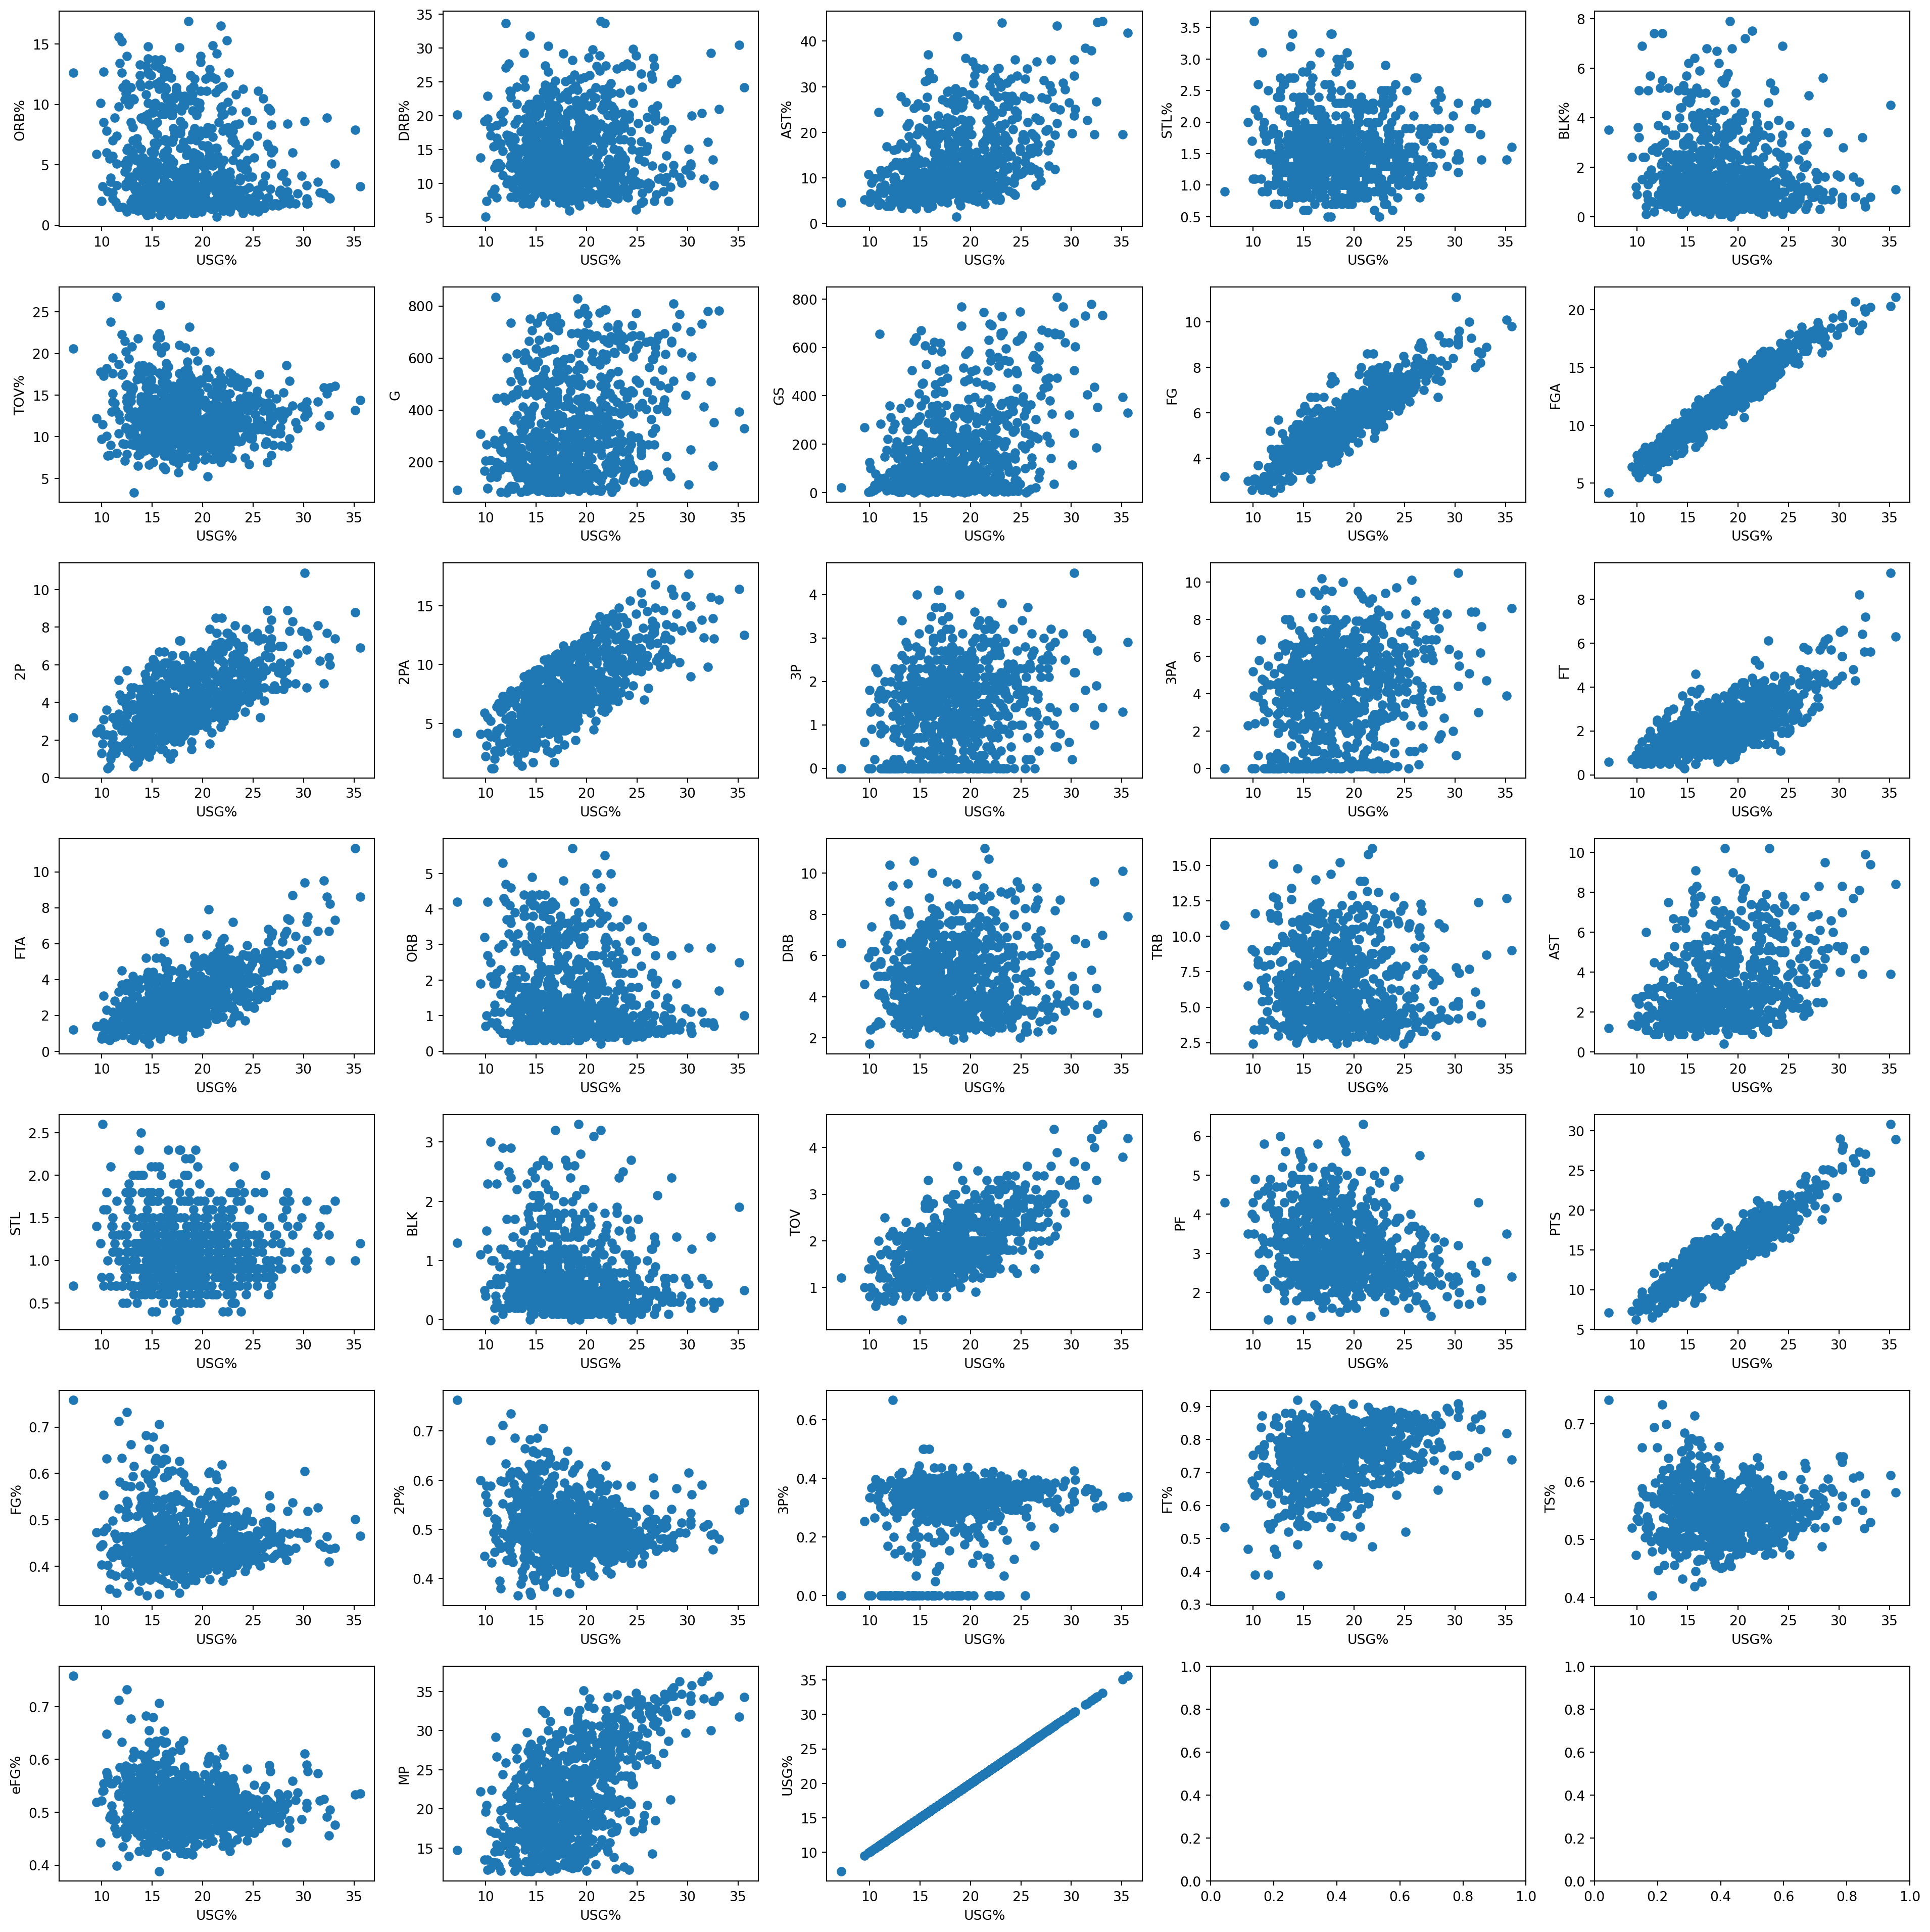

In [6]:
#| echo: false
#| eval: true

# select the columns to plot (all continuous variables and USG%)
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('USG%')
cols.append('USG%')

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# create a scatter plot for each continuous variable in relation to USG%
for ax, col in zip(axes.flatten(), cols):
    ax.scatter(df['USG%'], df[col])
    ax.set_xlabel('USG%')
    ax.set_ylabel(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

In [7]:
#| echo: true
#| eval: false

import seaborn as sns
import numpy as np

# select only the continuous variables from the DataFrame
df_continuous = df.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr_matrix = df_continuous.corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

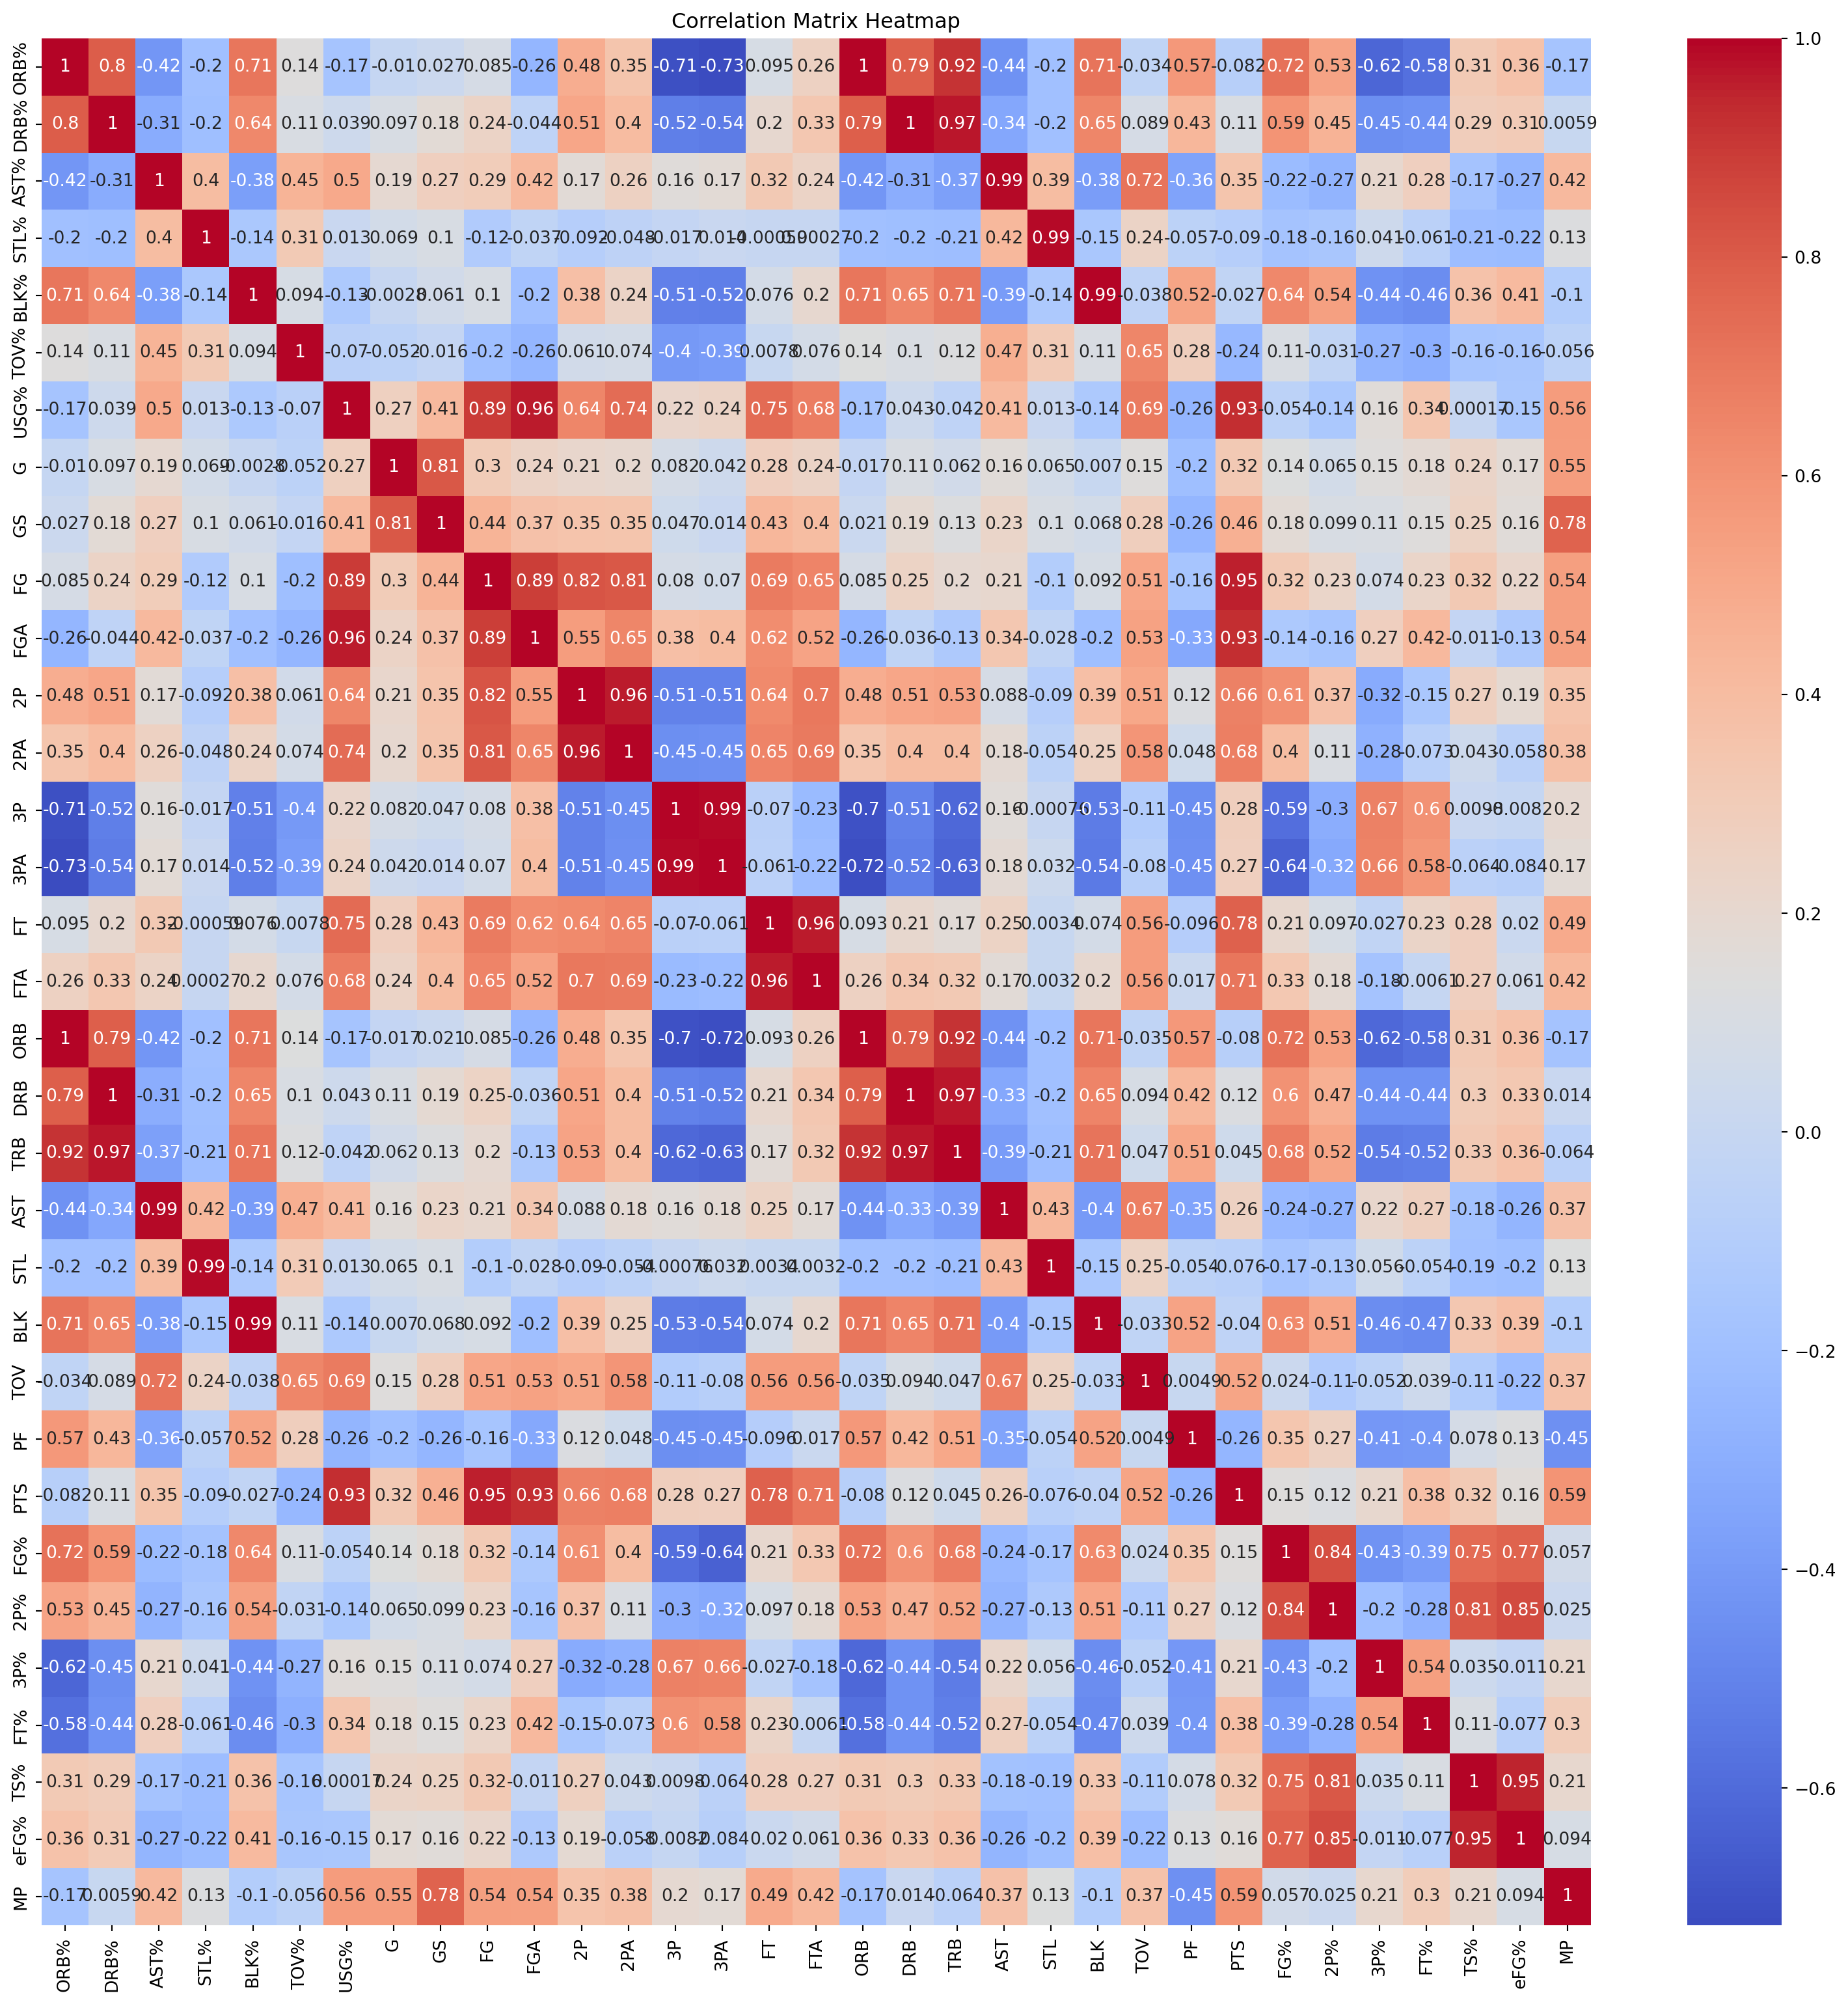

In [8]:
#| echo: false
#| eval: true

import seaborn as sns
import numpy as np

# select only the continuous variables from the DataFrame
df_continuous = df.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr_matrix = df_continuous.corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()